In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
df = pd.read_csv(r"C:\Users\USER\Desktop\5g_smartphones_dataset.csv")


In [2]:
#Counting the number of rows
df.shape[1] #row

10

In [3]:
#Counting the number of columns
df.shape[0] #column

958

In [4]:
#Trying to display maximum rows for better understanding of the dataset
pd.set_option("display.max.rows" , 958)

In [5]:
#Identifying missing values
df.isnull().sum()

Model                0
Brand                0
Screen Size (in)     0
Front Camera (MP)    0
Back Camera (MP)     0
Battery (mAh)        0
RAM (GB)             0
ROM (GB)             0
Clock Speed (Ghz)    0
Price (Rs.)          0
dtype: int64

In [6]:
#Checking the data types if there is a need for conversions
df.dtypes

Model                 object
Brand                 object
Screen Size (in)     float64
Front Camera (MP)    float64
Back Camera (MP)     float64
Battery (mAh)          int64
RAM (GB)               int64
ROM (GB)               int64
Clock Speed (Ghz)    float64
Price (Rs.)            int64
dtype: object

In [7]:
#Counting the number of duplicates in the data set if there is a need to remove
df.duplicated().sum()

0

In [8]:
#Checking unique values in each columns
df.nunique()

Model                958
Brand                 20
Screen Size (in)      45
Front Camera (MP)     18
Back Camera (MP)      15
Battery (mAh)         70
RAM (GB)               7
ROM (GB)               5
Clock Speed (Ghz)     31
Price (Rs.)          440
dtype: int64

In [9]:
#I checked for spelling error
df['Brand'].unique()

array(['Realme', 'OnePlus', 'Poco', 'Motorola', 'OPPO', 'Xiaomi',
       'Samsung', 'iQOO', 'Vivo', 'Apple', 'Nothing', 'Honor', 'CMF',
       'Infinix', 'Google', 'Tecno', 'Nokia', 'Lava', 'Asus', 'Huawei'],
      dtype=object)

In [10]:
#Checking statistical summary of the dataset
df.describe()

,Screen Size (in),Front Camera (MP),Back Camera (MP),Battery (mAh),RAM (GB),ROM (GB),Clock Speed (Ghz),Price (Rs.)
count,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000
mean,6.620605,20.355428,60.326931,4911.310021,8.336117,213.711900,2.664551,32268.014614
std,0.174938,12.249908,30.523394,529.124133,2.773168,145.448108,0.450573,26836.710855
min,5.400000,5.000000,8.000000,2438.000000,4.000000,64.000000,2.000000,7999.000000
25%,6.550000,12.000000,50.000000,4602.500000,6.000000,128.000000,2.400000,16991.000000
50%,6.670000,16.000000,50.000000,5000.000000,8.000000,128.000000,2.500000,23998.000000
75%,6.720000,32.000000,64.000000,5000.000000,8.000000,256.000000,3.000000,34999.000000
max,7.200000,60.000000,200.000000,6550.000000,24.000000,1024.000000,4.320000,179900.000000


In [11]:
#creating a new column for battery for a better visualization
df['Battery (mAh) Categories'] = pd.cut (df['Battery (mAh)'], bins = [ 2400, 3500, 4500, 5500, 6650], 
                                         labels = ['low (2400-3499 mAh)', 'Moderate (3500 - 4499 mAh)', 'High (4500 - 5499 mAh)' ,
                                                   'Very High (5500 - 6650mAh)'])

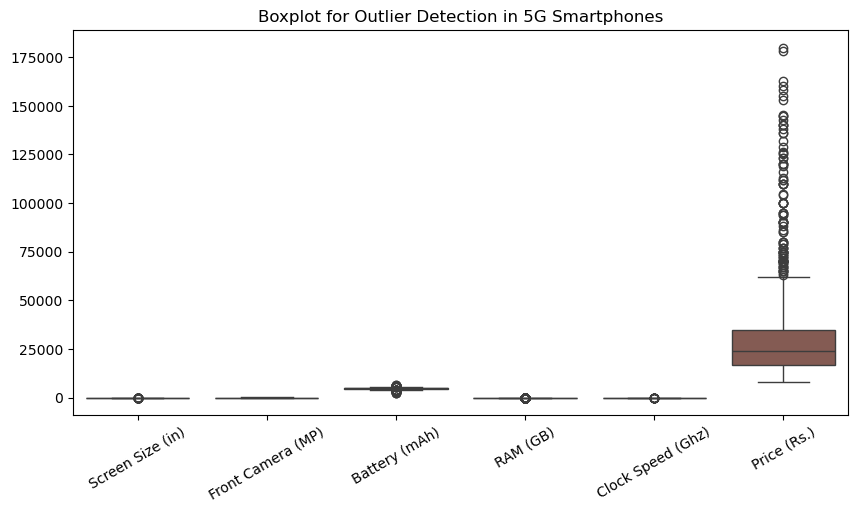

In [12]:
#Detect outliers
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['Screen Size (in)', 'Front Camera (MP)', 'Front Camera (MP)', 'Battery (mAh)', 'RAM (GB)', 'RAM (GB)', 'Clock Speed (Ghz)', 'Price (Rs.)']
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[columns])
plt.xticks(rotation=30)
plt.title("Boxplot for Outlier Detection in 5G Smartphones")
plt.show()


In [132]:
#checking those outliers

Q1 = df['Price (Rs.)'].quantile(0.25)
Q3 = df['Price (Rs.)'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Price (Rs.)'] < lower_bound) | (df['Price (Rs.)'] > upper_bound)]

outliers[['Brand', 'Model', 'Price (Rs.)']]



,Brand,Model,Price (Rs.)
23,Samsung,Samsung Galaxy S24 Ultra,99999
26,OnePlus,OnePlus 13,66999
30,Samsung,Samsung Galaxy S23 Ultra 5G,71999
33,Apple,Apple iPhone 16,74900
45,Vivo,Vivo X200 Pro 5G,94999
64,Apple,Apple iPhone 16 Pro Max,137900
84,Vivo,Vivo X200 5G,65999
102,Apple,Apple iPhone 15 Plus,66999
104,OnePlus,OnePlus 13 (24GB RAM+ 1TB),89998
114,Apple,Apple iPhone 16 Pro,112900


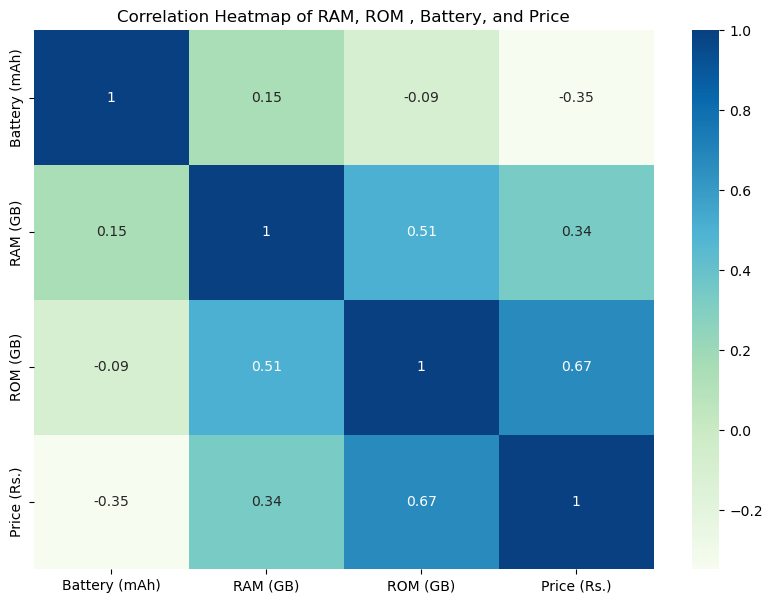

In [14]:
#'Correlation Heatmap of RAM, ROM , Battery, and Price

import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(10, 7))
sn.heatmap(df[["Battery (mAh)","RAM (GB)","ROM (GB)", "Price (Rs.)"]].corr() , annot = True ,cmap = 'GnBu')
plt.title('Correlation Heatmap of RAM, ROM , Battery, and Price')
plt.show()

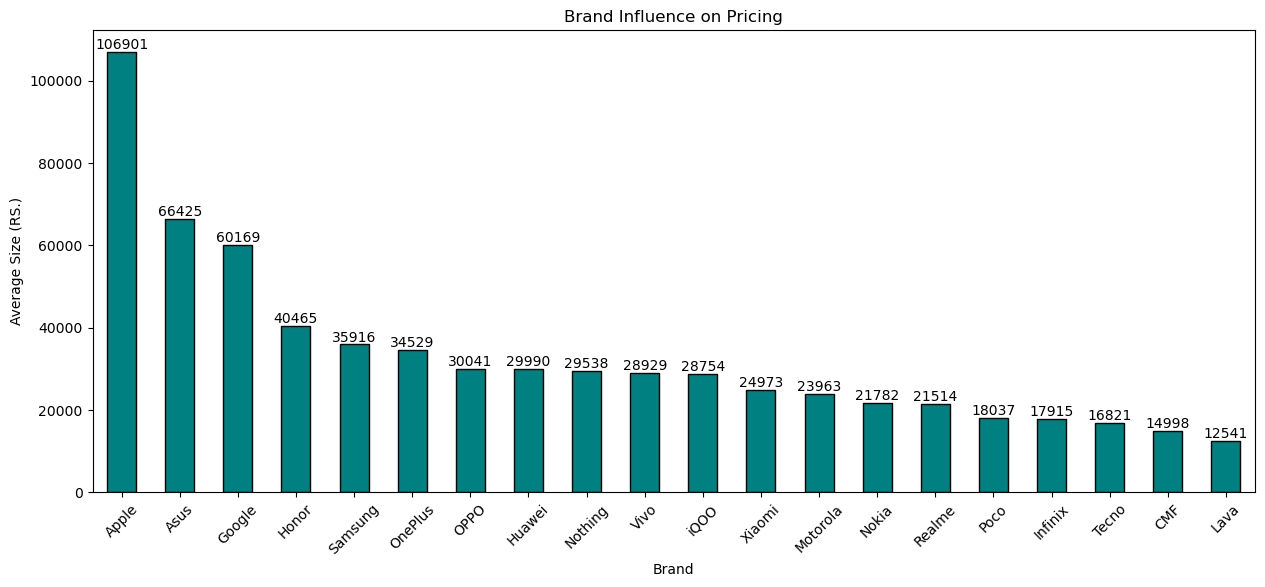

In [127]:
#Brand Influence on Pricing 
column= df.groupby('Brand')['Price (Rs.)'].mean().astype(int).sort_values(ascending= False)
column.plot(kind= 'bar' , figsize =(15,6), color="teal", edgecolor="black")
plt.xlabel('Brand')
plt.title('Brand Influence on Pricing')
plt.xticks(rotation=45) 
plt.ylabel('Average Size (RS.)')
for h, v in enumerate(column):
    plt.text(h,v,str(v), ha = 'center', va = 'bottom')
plt.show()                                            


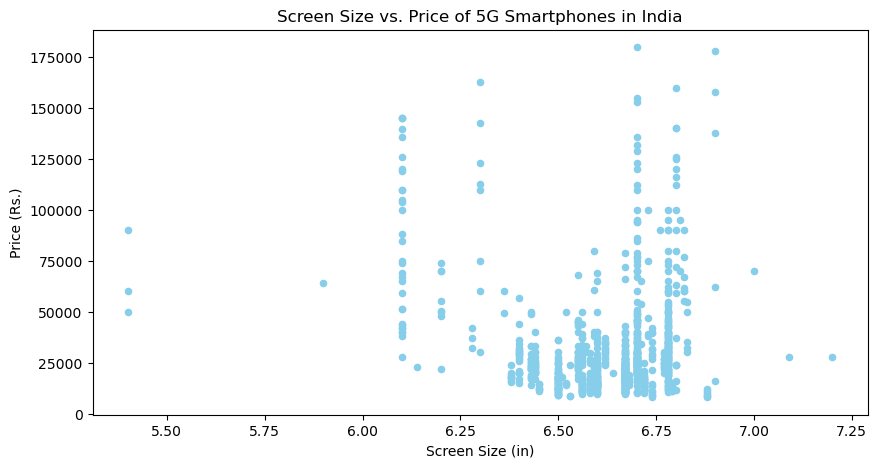

In [16]:
#Screen Size vs. Price – Analyze whether larger screens lead to higher smartphone prices
df.plot(kind = 'scatter' , x = 'Screen Size (in)' , y = 'Price (Rs.)' , color = 'skyblue', figsize = (10,5))
plt.title("Screen Size vs. Price of 5G Smartphones in India")
plt.show()

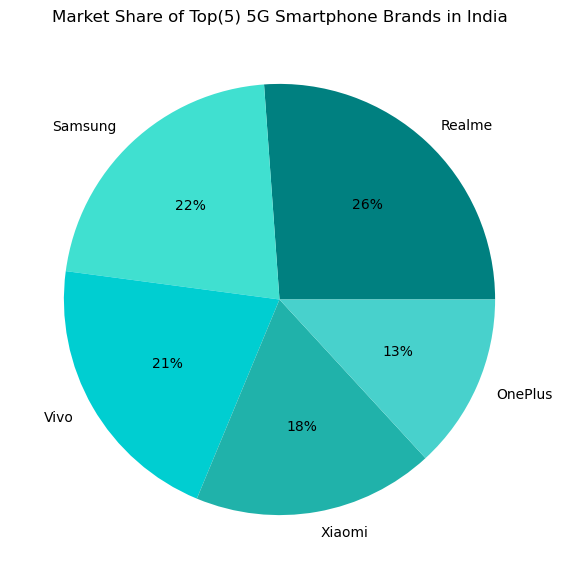

In [148]:
#Market Share of Top(5) 5G Smartphone Brands in India
df['Brand'].value_counts().nlargest(5).plot(kind= 'pie',autopct="%.0f%%",  figsize=(7, 7), colors=['teal', 'turquoise' , 'darkturquoise', 'lightseagreen', 'mediumturquoise'])
plt.title("Market Share of Top(5) 5G Smartphone Brands in India")
plt.ylabel('')
plt.show()

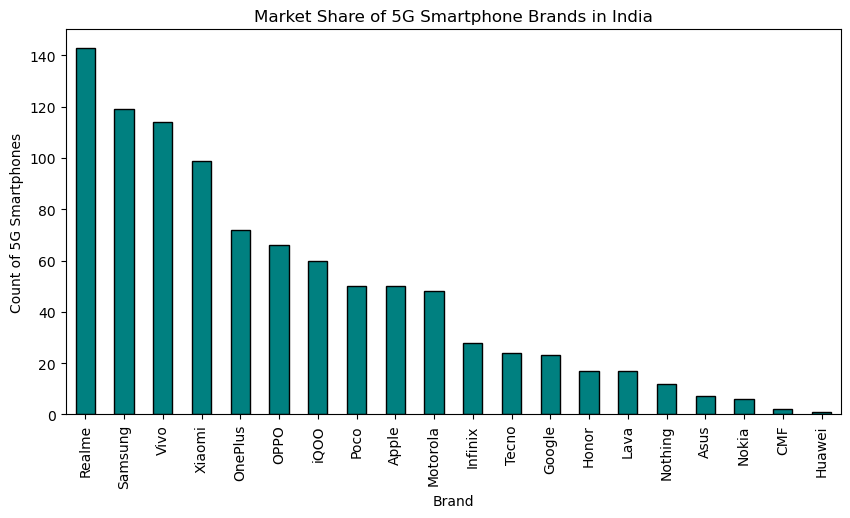

In [158]:
# overallMarket Share of 5G Smartphone Brands in India
df['Brand'].value_counts().sort_values(ascending=False).plot(kind= 'bar', edgecolor = 'black', color= 'teal',   figsize=(10, 5))
plt.title("Market Share of 5G Smartphone Brands in India")
plt.ylabel('Count of 5G Smartphones')
plt.show()

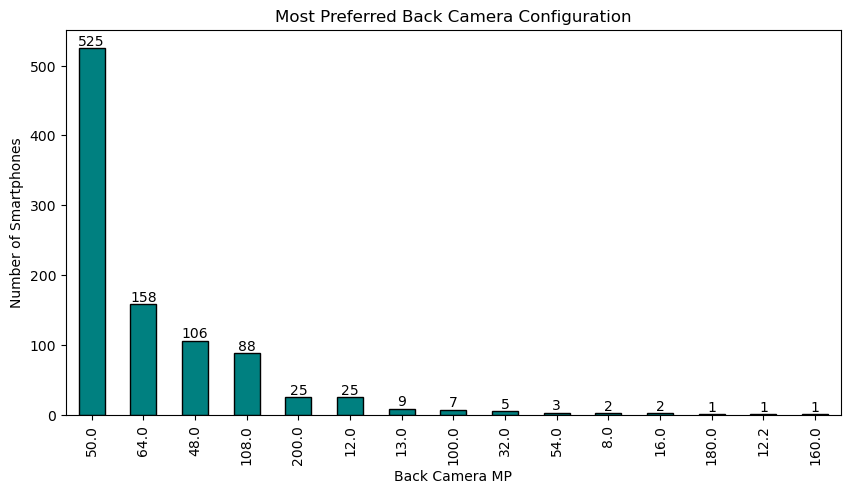

In [57]:
#Most Preferred Back Camera Configuration
col = df['Back Camera (MP)'].value_counts()
col.plot(kind= 'bar',edgecolor='black' , color='teal', figsize=(10, 5))
plt.title("Most Preferred Back Camera Configuration")
plt.xlabel('Back Camera MP')
plt.ylabel('Number of Smartphones') 
for h, v in enumerate(col):
    plt.text(h,v,str(v), ha = 'center', va = 'bottom')
plt.show()

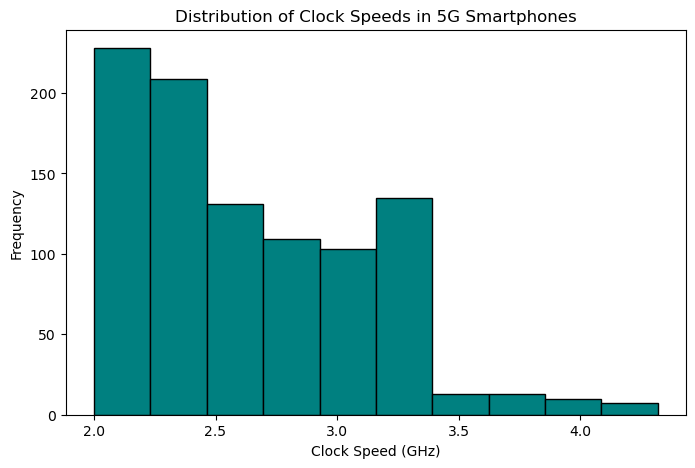

In [108]:
#Distribution of Clock Speeds in 5G Smartphone

df["Clock Speed (Ghz)"].plot(kind="hist", bins=10, color="teal", edgecolor="black", figsize=(8,5))
plt.title("Distribution of Clock Speeds in 5G Smartphones")
plt.xlabel("Clock Speed (GHz)")
plt.ylabel("Frequency")
plt.show()


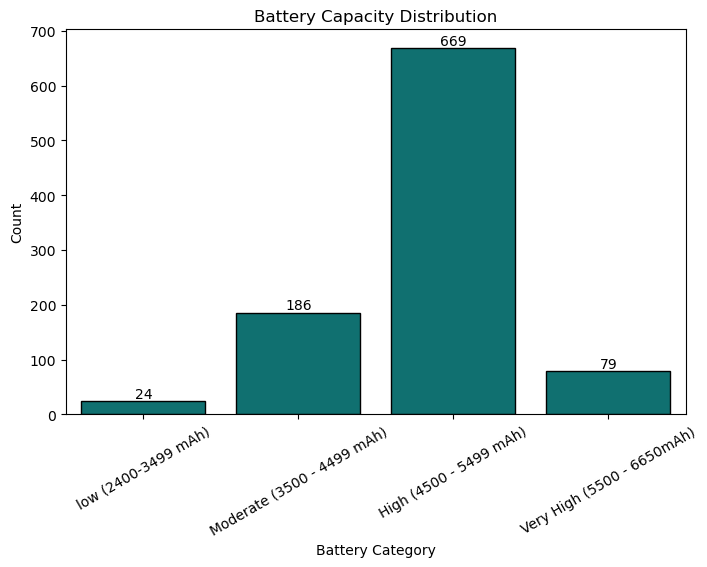

In [129]:
#Battery capacity Distribution
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 5))
sns.countplot(x=df["Battery (mAh) Categories"],edgecolor = 'black', color ="teal")
countbatterycat = df["Battery (mAh) Categories"].value_counts(sort= False)
plt.title("Battery Capacity Distribution")
plt.xlabel("Battery Category")
plt.ylabel("Count")
plt.xticks(rotation=30)
for h , v in enumerate(countbatterycat):
    plt.text(h,v,str(v), ha = 'center', va = 'bottom')
plt.show()

In [139]:
df

,Model,Brand,Screen Size (in),Front Camera (MP),Back Camera (MP),Battery (mAh),RAM (GB),ROM (GB),Clock Speed (Ghz),Price (Rs.),Battery (mAh) Categories
0,Realme 14 Pro Plus 5G,Realme,6.83,32.0,50.0,6000,8,128,2.50,29999,Very High (5500 - 6650mAh)
1,OnePlus 13R 5G,OnePlus,6.78,16.0,50.0,6000,12,256,3.30,42972,Very High (5500 - 6650mAh)
2,Realme 14 Pro 5G,Realme,6.77,16.0,50.0,6000,8,128,2.50,24999,Very High (5500 - 6650mAh)
3,Poco X7 Pro,Poco,6.67,20.0,50.0,6550,8,256,3.25,27999,Very High (5500 - 6650mAh)
4,Motorola Edge 50 Fusion,Motorola,6.67,32.0,50.0,5000,8,128,2.40,20999,High (4500 - 5499 mAh)
5,OPPO Reno 13 Pro 5G,OPPO,6.83,50.0,50.0,5800,12,256,3.35,49999,Very High (5500 - 6650mAh)
6,Xiaomi Redmi Note 14,Xiaomi,6.67,20.0,50.0,5110,6,128,2.50,17440,High (4500 - 5499 mAh)
7,Samsung Galaxy M35 5G,Samsung,6.60,13.0,50.0,6000,6,128,2.40,15027,Very High (5500 - 6650mAh)
8,Motorola Moto G85 5G,Motorola,6.67,32.0,50.0,5000,8,128,2.30,16999,High (4500 - 5499 mAh)
9,OnePlus Nord 4 5G,OnePlus,6.74,16.0,50.0,5500,8,128,2.80,26999,High (4500 - 5499 mAh)
